In [ ]:
import numpy as np
file_path = "/home/roseyu/Python/log/"
data_file = "lorenz/tt_rnn/predict.npy"
test_rslt = np.load(file_path+data_file)
test_true = test_rslt[0]
test_pred = test_rslt[1]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_pred[8000:9000,0])
plt.plot(test_true[8000:9000,0])

print(test_pred.shape)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(test_true, test_pred)))

## Compare the randomized hyper-parameter tuning 

In [76]:
#data_path = "/home/roseyu/Python/log/lorenz/"
#exp="lorenz" start_time="05-02-17-00-25-36"
import numpy as np

def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d
def print_forecast(start_time):
    i=0
    err_mat = np.ndarray((8,3))
    """pass in start-up of the experiments"""
    exps=["logistic"]#, "logistic"] #,"traffic","climate"
    models = ["basic_rnn", "basic_lstm",  "tensor_rnn_einsum"] #"matrix_rnn", "tensor_rnn",

    #start_time="05-02-17-13-55-40"
    use_error =""

    for exp in exps:
        for ts in range(5, 45, 5):
            j = 0
            for model in models:
                data_path = "/tmp/tensorRNN/log/"+exp+"/"+use_error+start_time+"/"+model+"/"+"ts_"+str(ts)+"/"
                file_name = "config_error.out"
                print(data_path)
                try:
                    with open(data_path+"/"+file_name,'rb') as fstream:
#                         for line in fstream:
#                             print(line)
                        config = read_config(fstream)
                        print config, model, i,j
                        err_mat[i,j]=config['test_error']
                        
                        j +=1
                        
                except IOError:
                    'no file'
                    
            i+=1
    return err_mat

### forecasting with error propagation

In [77]:
#print_forecast("05-02-17-13-55-40")
#print_forecast("05-02-17-23-53-19")
#print_forecast("05-07-17-19-09-09")
#print_forecast("05-03-17-19-06-14")
err_mat = print_forecast("05-09-17-19-31-50")
np.save("/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/test_err.npy",err_mat)

/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/basic_rnn/ts_5/
/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/basic_lstm/ts_5/
/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/tensor_rnn_einsum/ts_5/
/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/basic_rnn/ts_10/
{'train_error': 0.113168155581, 'valid_error': 0.111658373841, 'learning_rate': 0.001, 'num_steps': 10.0, 'num_layers': 1.0, 'hidden_size': 64.0, 'test_error': 0.332176279907} basic_rnn 1 0
/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/basic_lstm/ts_10/
{'train_error': 0.106389834129, 'valid_error': 0.124746059296, 'learning_rate': 0.003, 'num_steps': 10.0, 'num_layers': 2.0, 'hidden_size': 64.0, 'test_error': 0.316618788965} basic_lstm 1 1
/tmp/tensorRNN/log/logistic/05-09-17-19-31-50/tensor_rnn_einsum/ts_10/
{'train_error': 0.00859661792386, 'valid_error': 0.149765002521, 'learning_rate': 0.003, 'num_steps': 10.0, 'num_layers': 2.0, 'hidden_size': 64.0, 'test_error': 0.00339514388248} tensor_rnn_einsum 1 2
/tmp/tensorRNN/log/logis

AttributeError: 'list' object has no attribute 'legend'

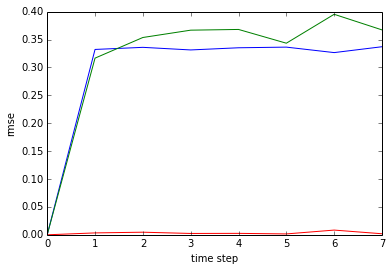

In [78]:
### plot the error
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.plot(err_mat, label=['rnn','lstm','trnn'])
plt.xlabel('time step')
plt.ylabel('rmse')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()


### hyper-parameter tuning for lstm

In [ ]:
import re
import numpy as np
model = "lstm"
err_list = []
hz_list = []
lr_list = []

        
for i in range(10):
    data_path = "/home/roseyu/Python/log/lorenz/basic_lstm_"+str(i)
    file_name = "config_error.out"
    
    try:
        with open(data_path+"/"+file_name,'rb') as fstream:
            #for line in fstream:
                #print(line)
            config = read_config(fstream)
            print config
            lr_list.append(config['learning_rate'])
            hz_list.append(config['hidden_size'])
            err_list.append(config['test_error'])
    except IOError:
        'no file'


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = np.asarray(lr_list)
hz = np.asarray(hz_list)
err = np.asarray(err_list)

order = np.argsort(lr)
lr = lr[order]
err = err[order]
hz = hz[order]

plt.plot(lr[hz==128], err[hz==128])
plt.plot(lr[hz==256], err[hz==256])
plt.plot(lr[hz==64], err[hz==64])

print err